# met switch

# Light example: generate influence diagram

- 1 light + 1 switch
- normal operation and so highest chance: light is on and switch set to on
- both components have a health variable
- light 1 can be tested with 2 tests
  - test 1 is cheapest test
  - test 2 is more expensive
- when test 2 negative then replace component
- switch can be tested with 1 test 
- 

this notebook generates the influence diagram

In [1]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [2]:
# create influence diagram
diag = gum.InfluenceDiagram()

# influence diagram structure

chance, decision and utility variables

CL1: light 1 
- normal behavior is light 1 is on 
- but can also be off

HL1: light 1 health 
- models if light is broken. 
- If HL1 set to broken light 1 will be off. 
- So light 1 is conditionally dependent on L1H

In [3]:
# CL1 and HL1
CL1 = diag.addChanceNode(gum.LabelizedVariable('CL1', 'L1 component', ["on", "off"]))
HL1 = diag.addChanceNode(gum.LabelizedVariable('HL1', 'L1 health', ["ok", "broken"]))

# CL1 is conditionally dependent on L1H
diag.addArc(HL1, CL1)

DT1: test 1
- decision variable test 1 determines if test 1 will be performed
- values are yes / no
- if HL1 is likely broken DT1 becomes relevant

RL1T1: test result of test 1
- chance variable test 1 result models outcome of test 1: OK, not OK
- not done is also an option if DT1 set to no

UT1: utility of test 1
- function of L1H and DT1 
- when low health it's likely to perform test for more assurance

In [4]:
DL1T1 = diag.addDecisionNode(gum.LabelizedVariable('DL1T1', 'Decide T1', ["yes", "no"]))
RL1T1 = diag.addChanceNode(gum.LabelizedVariable('RL1T1', 'Result T1', ["not done", "ok", "broken"]))
UL1T1 = diag.addUtilityNode(gum.LabelizedVariable("UL1T1", "R(L1H, DT1)", 1))

In [5]:
diag.addArc(DL1T1, UL1T1)
diag.addArc(HL1, RL1T1)
diag.addArc(HL1, UL1T1)

DT2 test 2
- decision variable test 2 determines if test 2 will be performed
- values are yes / no
- if RL1T1 is likely broken DT1 becomes relevant

RT2: test result of test 2
- chance variable test 2 result models outcome of test 2: OK, not OK
- not done is also an option if DT2 set to no

UT2: utility of test 1
- function of RL1T1 and DT2 
- when low health it's likely to perform test for more assurance

In [17]:
DL1T2 = diag.addDecisionNode(gum.LabelizedVariable('DL1T2', 'Decide T2', ["yes", "no"]))
RL1T2 = diag.addChanceNode(gum.LabelizedVariable('RL1T2', 'Result T2', ["not done", "ok", "broken"]))
UL1T2 = diag.addUtilityNode(gum.LabelizedVariable("UL1T2", "R(RL1T1, DL1T2)", 1))

In [18]:
diag.addArc(DL1T2, UL1T2)
diag.addArc(RL1T1, RL1T2)
diag.addArc(RL1T1, UL1T2)

DRL1, decision to replace light 1
- decision variable DRL1 to decide if light 1 needs replacing
- values are replace / keep
- if RT2 is likely broken DRL1 becomes relevant

URL1: utility for replacing light 1
- function of RT2 and DRL1 
- when low health it's likely to perform test for more assurance

In [19]:
DRL1 = diag.addDecisionNode(gum.LabelizedVariable('DRL1', 'replace Light 1 T2', ["replace", "keep"]))
URL1 = diag.addUtilityNode(gum.LabelizedVariable("URL1", "R(RT2, DRL1)", 1))

In [20]:
diag.addArc(DRL1, URL1)
diag.addArc(RL1T2, URL1)

CS1, switch to turn CL1 on or off
- normal behavior is switch should be on to support light to be on

HS1
- models health of the switch, if broken switch will be off

In [21]:
CS1 = diag.addChanceNode(gum.LabelizedVariable('CS1', 'S1 component', ["on", "off"]))
HS1 = diag.addChanceNode(gum.LabelizedVariable('HS1', 'S1 health', ["ok", "broken"]))

In [22]:
diag.addArc(HS1, CS1)
diag.addArc(CS1, CL1)

DT1: test 1
- decision variable test 1 determines if test 1 will be performed
- values are yes / no
- if HL1 is likely broken DT1 becomes relevant

RL1T1: test result of test 1
- chance variable test 1 result models outcome of test 1: OK, not OK
- not done is also an option if DT1 set to no

UT1: utility of test 1
- function of L1H and DT1 
- when low health it's likely to perform test for more assurance

In [23]:
DS1T1 = diag.addDecisionNode(gum.LabelizedVariable('DS1T1', 'Decide S1T1', ["yes", "no"]))
RS1T1 = diag.addChanceNode(gum.LabelizedVariable('RS1T1', 'Result S1T1', ["not done", "ok", "broken"]))
US1T1 = diag.addUtilityNode(gum.LabelizedVariable("US1T1", "R(HS1, DS1T1)", 1))

In [24]:
diag.addArc(DS1T1, US1T1)
diag.addArc(HS1, RS1T1)
diag.addArc(HS1, US1T1)

test 2 for S1 

In [25]:
DRS1 = diag.addDecisionNode(gum.LabelizedVariable('DRS1', 'replace switch S1', ["replace", "keep"]))
URS1 = diag.addUtilityNode(gum.LabelizedVariable("URS1", "R(RS1T1, DRS1)", 1))

In [27]:
diag.addArc(RS1T1, URS1)
diag.addArc(DRS1, URS1)

Influence Diagram{
  chance: 3,
  utility: 1,
  decision: 1,
  arcs: 4,
  domainSize: 24
}


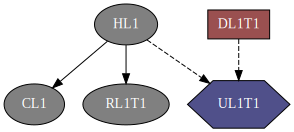

In [6]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)

# probabilities

In [7]:
# CL1
diag.cpt(CL1)[{"CS1":0, "HL1":0}] = [0.99, 0.01]  # CS1:on,  HL1:ok     > CL1 should be on
diag.cpt(CL1)[{"CS1":0, "HL1":1}] = [0.05, 0.95]  # CS1:on,  HL1:broken > CL1 should be off
diag.cpt(CL1)[{"CS1":1, "HL1":0}] = [0.1, 0.9]    # CS1:off, HL1:ok     > CL1 should be off
diag.cpt(CL1)[{"CS1":1, "HL1":1}] = [0.05, 0.95]  # CS1:off, HL1:broken > CL1 should be off

In [8]:
# HL1
diag.cpt(HL1)[0] = 0.7  # most likely light is not broken
diag.cpt(HL1)[1] = 0.3  # but 30% chance light is broken

In [ ]:
# RL1T1
diag.cpt(RL1T1)[{"HL1": "ok"}]          = [0.95, 0.05, 0.0]  # HL1:ok > RL1T1 likely not done
diag.cpt(RL1T1)[{"HL1": "broken"}]      = [0.4, 0.1, 0.5]  # HL1:broken > RL1T1 likely broken

In [ ]:
# RL1T2
diag.cpt(RL1T2)[{"RL1T1": "not done"}]    = [0.95, 0.05, 0.0]   # RL1T1:not done > RL1T2 likely not done
diag.cpt(RL1T2)[{"RL1T1": "ok"}]          = [0.05, 0.90, 0.05]  # RL1T1:ok > RL1T2 likely OK
diag.cpt(RL1T2)[{"RL1T1": "broken"}]      = [0.4, 0.1, 0.5]   # RL1T1:broken > RL1T2 likely broken or not done

In [ ]:
gnb.flow.row(diag.cpt(CL1),
            diag.cpt(HL1),
            diag.cpt(RL1T1),
            diag.cpt(RT2),
            captions=[  "prior of CL1",
                        "prior of HL1",
                        "prior of RL1T1",
                        "prior of RT2"
                      ])

In [ ]:
# CS1
diag.cpt(CS1)[{"HS1":0}] = [0.95, 0.05]  # when CS1:on, HS1: healthy > CS1 should be on
diag.cpt(CS1)[{"HS1":1}] = [0.1, 0.9]  # when CS1:on, HS1: broken > CS1 likely off

In [ ]:
# HS1
diag.cpt(HS1)[0] = 0.7  # most likely light is not broken
diag.cpt(HS1)[1] = 0.3  # but 30% chance light is broken

In [ ]:
# RS1T1
diag.cpt(RS1T1)[{"HS1": "ok"}]          = [0.95, 0.05, 0.0]  # Hs1:ok > RST1 likely not done
diag.cpt(RS1T1)[{"HS1": "broken"}]      = [0.4, 0.1, 0.5]  # HS1:broken > RST1 likely broken

In [ ]:
gnb.flow.row(diag.cpt(CS1),
            diag.cpt(HS1),
            diag.cpt(RST1),
            captions=[  "prior of CS1",
                        "prior of HS1",
                        "prior of RST1"
                      ])

# utility function

In [9]:
diag.utility("UL1T1")[{"HL1":"ok", "DL1T1": "yes"}]           = 1   # test done but not relevant
diag.utility("UL1T1")[{"HL1":"broken", "DL1T1": "yes"}]       = 3   # test done when broken, excellent
diag.utility("UL1T1")[{"HL1":"ok", "DL1T1": "no"}]            = 2   # test not done but that's ok
diag.utility("UL1T1")[{"HL1":"broken", "DL1T1": "no"}]        = 0   # test not done when broken: missed chance

In [ ]:
diag.utility("UL1T2")[{"RL1T1":"not done", "DL1T2": "yes"}]     = 1   # test done but not relevant
diag.utility("UL1T2")[{"RL1T1":"ok", "DL1T2": "yes"}]           = 0   # test done but not relevant
diag.utility("UL1T2")[{"RL1T1":"broken", "DL1T2": "yes"}]       = 3   # test done when broken, excellent
diag.utility("UL1T2")[{"RL1T1":"not done", "DL1T2": "no"}]      = 2   # test not done but not relevant
diag.utility("UL1T2")[{"RL1T1":"ok", "DL1T2": "no"}]            = 3   # test not done but that's ok
diag.utility("UL1T2")[{"RL1T1":"broken", "DL1T2": "no"}]        = 2   # test not done when broken: missed chance


In [ ]:
diag.utility("URL1")[{"RL1T2":"not done", "DRL1": "replace"}]    = 2   # test done but not relevant
diag.utility("URL1")[{"RL1T2":"not done", "DRL1": "keep"}]       = 4   # test not done but that's ok
diag.utility("URL1")[{"RL1T2":"ok"      , "DRL1": "replace"}]          = 0   # test done but not relevant
diag.utility("URL1")[{"RL1T2":"ok"      , "DRL1": "keep"}]             = 3   # test not done but that's ok
diag.utility("URL1")[{"RL1T2":"broken"  , "DRL1": "replace"}]      = 4   # test done when broken, excellent
diag.utility("URL1")[{"RL1T2":"broken"  , "DRL1": "keep"}]         = 4   # test not done when broken: missed chance

In [ ]:
gnb.flow.row(diag.utility("UL1T1"),
            diag.utility("UL1T2"),
            diag.utility("URL1"),
           
            captions=[  "utility UT1",
                        "utility UT2",
                        "utility URL1",
                      ])

In [ ]:
diag.utility("US1T1")[{"HS1":"ok"    , "DS1T1": "yes"}]       = 1   # test done but not relevant
diag.utility("US1T1")[{"HS1":"broken", "DS1T1": "yes"}]       = 3   # test done when broken, excellent
diag.utility("US1T1")[{"HS1":"ok"    , "DS1T1": "no"}]        = 2   # test not done but that's ok
diag.utility("US1T1")[{"HS1":"broken", "DS1T1": "no"}]        = 0   # test not done when broken: missed chance

In [ ]:
diag.utility("URS1")[{"RS1T1":"not done", "DRS1": "replace"}]    = 2   # test done but not relevant
diag.utility("URS1")[{"RS1T1":"not done", "DRS1": "keep"}]       = 4   # test not done but that's ok
diag.utility("URS1")[{"RS1T1":"ok"      , "DRS1": "replace"}]          = 0   # test done but not relevant
diag.utility("URS1")[{"RS1T1":"ok"      , "DRS1": "keep"}]             = 3   # test not done but that's ok
diag.utility("URS1")[{"RS1T1":"broken"  , "DRS1": "replace"}]      = 4   # test done when broken, excellent
diag.utility("URS1")[{"RS1T1":"broken"  , "DRS1": "keep"}]         = 4   # test not done when broken: missed chance

In [ ]:
gnb.flow.row(diag.utility("US1T1"),
            diag.utility("URS1"),
           
            captions=[  "utility US1T1",
                        "utility URS1"
                      ])

In [10]:
diag.saveBIFXML("lightv6.xml")